In [2]:
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation
import seaborn as sns; sns.set(style='white', context='paper',
                               rc={'font.size': 7, 
                                   'axes.titlesize': 9,
                                   'axes.labelsize': 8,
                                   'xtick.labelsize': 7,
                                   'ytick.labelsize': 7,
                                   'legend.fontsize' : 7,
                                   'legend.markerscale': 0.7,
                                   'axes.spines.top': False,
                                   'axes.spines.right': False,
                                   'axes.linewidth': 0.4,
                                   'xtick.labelbottom': False,
                                   'ytick.labelleft': False,
                                   'figure.constrained_layout.use': True,
                                   'figure.dpi': 200})
from matplotlib import pyplot as plt

---
# Figure 1 - Effective dimensionality

/home/eric/anaconda3/envs/bs/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


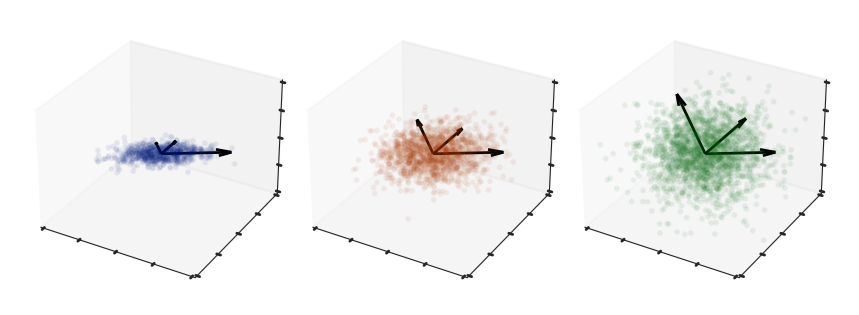

In [88]:
np.random.seed(0)

n_samples_base = 500

eigvecs = Rotation.from_euler('xyz', [0*np.pi/4, .5*np.pi/4, 0*np.pi/4]).apply(np.eye(3))
all_eigvals = np.array([[1, .125, .037],
                        [1, .5, .33], 
                        [1, 1, 1]])

fig = plt.figure(figsize=(4.125,  4.125 / len(all_eigvals)))

for i, eigvals in enumerate(all_eigvals):
    ax = fig.add_subplot(1, len(all_eigvals), i + 1, projection='3d')
    ax.set(xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))
    ax.grid(False)
    
    n_samples = int((4/3 * np.pi * (eigvals ** .2).prod()) * n_samples_base)
    samples = np.random.multivariate_normal(mean=[0, 0, 0], 
                                            cov=eigvecs @ np.diag(eigvals / 8) @ eigvecs.T, 
                                            size=n_samples)
    ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], s=2, c=sns.color_palette('dark').as_hex()[i], alpha=0.05)
    
    radii = eigvecs * np.sqrt(eigvals)
    ax.quiver(0, 0, 0, radii[0, 0], radii[1, 0], radii[2, 0], color='black', linewidth=1, arrow_length_ratio=0.2)
    ax.quiver(0, 0, 0, radii[0, 1], radii[1, 1], radii[2, 1], color='black', linewidth=1, arrow_length_ratio=0.2)
    ax.quiver(0, 0, 0, radii[0, 2], radii[1, 2], radii[2, 2], color='black', linewidth=1, arrow_length_ratio=0.2)

fig.subplots_adjust(wspace=-.032, hspace=-.063, left=0, right=1, bottom=0, top=1)
plt.savefig('saved/methods_01_ED.png', dpi=300)
plt.show()

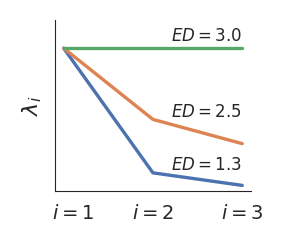

In [94]:
fig, ax = plt.subplots(figsize=(1.3, 1.1))

ax.plot([1, 2, 3], all_eigvals[0, :])
ax.plot([1, 2, 3], all_eigvals[1, :], label=r'$ED = 2.5$')
ax.plot([1, 2, 3], all_eigvals[2, :], label=r'$ED = 3$')
ax.text(2.2, .15, r'$ED = 1.3$', fontsize=6)
ax.text(2.2, .52, r'$ED = 2.5$', fontsize=6)
ax.text(2.2, 1.05, r'$ED = 3.0$', fontsize=6)
ax.set(ylim=(0, 1.2), ylabel=r'$\lambda_i$')
ax.set_xticks([1.1, 2, 3])
ax.set_xticklabels([r'$i=1$', r'$i=2$', r'$i=3$'], minor=False)
ax.tick_params(axis='x', labelbottom=True, which='major', pad=0)

plt.savefig('saved/methods_01_eigspectrum.png', dpi=300)
plt.show()

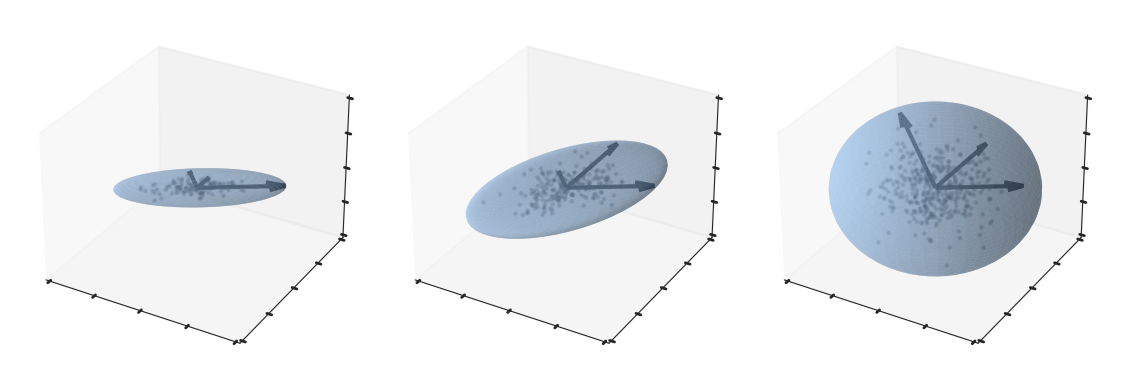

In [308]:
np.random.seed(0)

n_samples_base = 100

u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
sphere = np.stack([np.cos(u)*np.sin(v), 
                   np.sin(u)*np.sin(v), 
                   np.cos(v)])

eigvecs = Rotation.from_euler('xyz', [0*np.pi/4, .5*np.pi/4, 0*np.pi/4]).apply(np.eye(3))
all_eigvals = np.array([[1, .05, .05],
                        [1, 1, .05], 
                        [1, 1, 1]])

fig = plt.figure(figsize=(5.5, 5.5 / len(all_eigvals)))
light_c = sns.color_palette('pastel').as_hex()
dark_c = sns.color_palette('dark').as_hex()

for i, eigvals in enumerate(all_eigvals):
    ax = fig.add_subplot(1, len(all_eigvals), i + 1, projection='3d')
    ax.set(xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))
    ax.grid(False)
    
    n_samples = int((4/3 * np.pi * (eigvals ** .2).prod()) * n_samples_base)
    samples = np.random.multivariate_normal(mean=[0, 0, 0], 
                                            cov=eigvecs @ np.diag(eigvals / 15) @ eigvecs.T, 
                                            size=n_samples)
    ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], s=1, c='black', alpha=0.2)
    
    ellipsoid = eigvecs @ np.diag(np.sqrt(eigvals)) @ eigvecs.T @ sphere.reshape(3, -1)
    ellipsoid = ellipsoid.reshape(*sphere.shape)
    ax.plot_surface(ellipsoid[0], ellipsoid[1], ellipsoid[2], linewidth=0, alpha=0.5, color=light_c[0])
    
    radii = eigvecs * np.sqrt(eigvals)
    ax.quiver(0, 0, 0, radii[0, 0], radii[1, 0], radii[2, 0], color='black', linewidth=1.5, arrow_length_ratio=0.2)
    ax.quiver(0, 0, 0, radii[0, 1], radii[1, 1], radii[2, 1], color='black', linewidth=1.5, arrow_length_ratio=0.2)
    ax.quiver(0, 0, 0, radii[0, 2], radii[1, 2], radii[2, 2], color='black', linewidth=1.5, arrow_length_ratio=0.2)

plt.show()

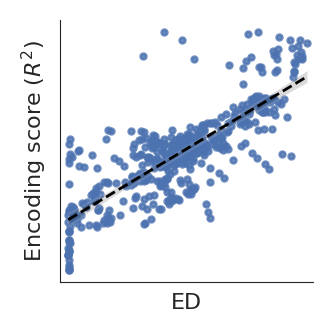

In [95]:
dataset = 'imagenet'
tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data = pd.merge(pd.read_csv(f'../../results/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results/manifolds|dataset:{dataset}|pooling:True.csv'), 
                on=['architecture', 'task', 'kind', 'source', 'layer'])
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

fig, ax = plt.subplots(1, 1, figsize=(1.55, 1.55))

ax.set_xlim(0.9, 30)
sns.regplot(data=data, x='within-concept dimensionality (mean)', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel='ED', ylabel=r'Encoding score $(R^2)$', xscale='log')

plt.savefig('saved/methods_02_trend.png', dpi=300)
plt.show()